In [5]:
library(tidyverse)
library(ggplot2)
options(repr.plot.width=8, repr.plot.height=4)

# **STATS 306 Homework 4**

## Problem 1: Iris Data (3 points)

For this problem, we will work on the `iris` data which we have already explored in lab.

**(a)** Reshape `iris` dataset so that each row contains the following information: the Species, the Flower_Feature (Sepal.Length, Sepal.Width, Petal.Length, or Petal.Width), and the Measurement. Then reproduce the following plot. (2 points)

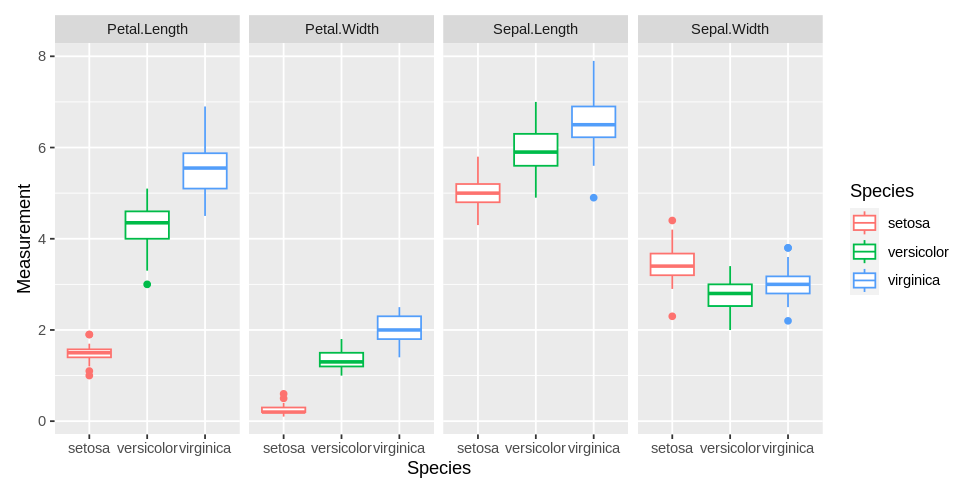

In [ ]:
#YOUR SOLUTION HERE

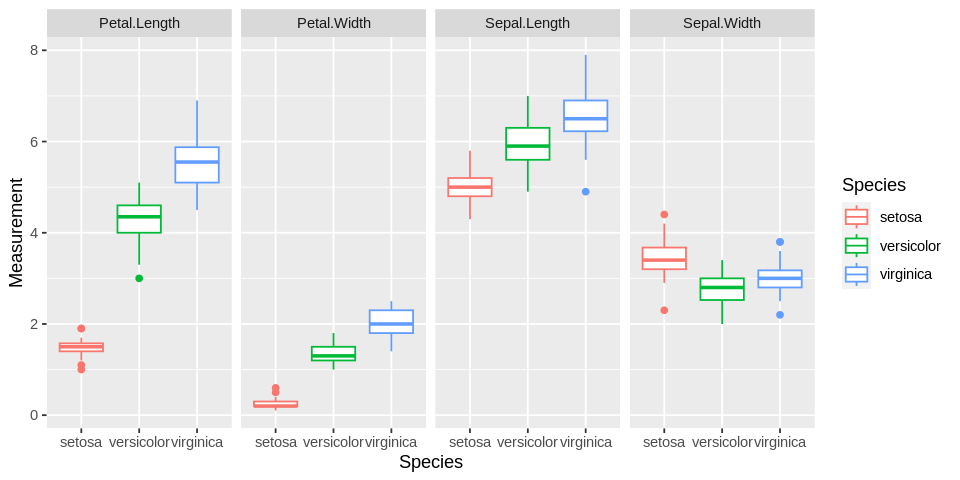

In [ ]:
#YOUR SOLUTION HERE
iris_long <- iris %>%
  pivot_longer(names_to = "Flower_Feature",
               values_to = "Measurement",
               cols = Sepal.Length:Petal.Width)

iris_long %>%
  ggplot (aes (x = Species, y = Measurement, col=Species)) +
  geom_boxplot () +
  facet_grid(~ Flower_Feature)

**(b)** For each species, compute the mean and standard deviation of `Sepal.Length` and `Sepal.Width` whose sepal area (defined by the product of sepal length and sepal width) is at least 20, then count the number of observations for each species. (1 point)

In [ ]:
#YOUR SOLUTION HERE

In [ ]:
#YOUR SOLUTION HERE
iris %>%
  select (Species, Sepal.Length, Sepal.Width) %>%
  mutate (Sepal.Area = Sepal.Length*Sepal.Width) %>%
  filter (Sepal.Area >= 20) %>%
  group_by (Species) %>%
  summarise (across (c(Sepal.Length, Sepal.Width),
             list(mean = mean, sd = sd)),
             n = n())

Species,Sepal.Length_mean,Sepal.Length_sd,Sepal.Width_mean,Sepal.Width_sd,n
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
setosa,5.528571,0.2138090,4.042857,0.2070197,7
versicolor,6.587500,0.3313932,3.175000,0.1281740,8
virginica,7.019231,0.4980114,3.165385,0.2827611,26


### Problem 2: Space dogs (2 points)
For this problem, you'll work on an pre-processed sample of the USSR space dogs database `space_dogs_df` compiled by Duncan Geere. Each of the 42 rows in this dataset represents a test rocket launch which had one or two very brave dogs on board.

In [ ]:
space_dogs_df <- read.csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSrv7ECpC0Jwv5u4Y5KZFZOGJ2SnEruSs7xoGs_ZPLbLS5CI32JVRLAxpv0dyneZovOOQ_jyaqcZeoh/pub?gid=0&single=true&output=csv",
                          na.strings=c("","NA"))
head(space_dogs_df)

,date,result,name_1,name_2,gender_1,gender_2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1966-02-22,recovered safely after a 22-day flight,Ugolyok / Snezhok,Veterok / Bzdunok,Male,Male
2,1961-03-25,"one orbit, recovered safely",Zvezdochka,NA,Female,NA
3,1961-03-09,"one orbit, recovered safely",Chernuskha,NA,Female,NA
4,1960-12-22,"upper stage failed, dogs recovered after a suborbital flight",Shutka,Kometka,Female,Female
5,1960-12-01,"spent one day in orbit, capsule was destroyed, both dogs died",Mushka,Pchyolka,Female,Female
6,1960-09-22,recovered safely,Kusachka / Otvazhnaya,Neva,Female,Female



**(a)** Reshape `space_dogs_df` so that for each launch, each dog has a row with columns `date`,`result`,`dog_id`,`name` and `gender`. Note that in the columns (`name_1`, `name_2`, `gender_1`, and `gender_2`), the part before the `_` separator can point to two different variables (`name` and `gender`), while the second part always points to the `dog_id` (1st or 2nd dog). Store the reshaped data as `space_dogs_long` and print the first six rows. Hint: check the usage of `.value` in `names_to` argument. (1 point)

In [ ]:
#YOUR SOLUTION HERE

In [ ]:
#YOUR SOLUTION HERE
space_dogs_long <- space_dogs_df %>%
  pivot_longer(name_1:gender_2,
               names_sep = "_",
               names_to = c(".value", "dog_id"))

head(space_dogs_long)

date,result,dog_id,name,gender
<chr>,<chr>,<chr>,<chr>,<chr>
1966-02-22,recovered safely after a 22-day flight,1,Ugolyok / Snezhok,Male
1966-02-22,recovered safely after a 22-day flight,2,Veterok / Bzdunok,Male
1961-03-25,"one orbit, recovered safely",1,Zvezdochka,Female
1961-03-25,"one orbit, recovered safely",2,NA,NA
1961-03-09,"one orbit, recovered safely",1,Chernuskha,Female
1961-03-09,"one orbit, recovered safely",2,NA,NA


**(b)** For `space_dogs_long`, drop missing values and find the `result` with the most number of dogs. (1 point)

In [ ]:
#YOUR SOLUTION HERE

In [ ]:
#YOUR SOLUTION HERE
space_dogs_long %>%
  drop_na() %>%
  group_by(result) %>%
  summarise(n = n()) %>%
  arrange(desc(n)) %>%
  head()

result,n
<chr>,<int>
recovered safely,48
"cabin decompression, both dogs died",4
"parachute failed, both dogs died",4
"exploded during launch, both dogs died",2
"failed, both dogs died",2
"one orbit, recovered safely",2


Most dogs have the result 'recovered safely'.

### Problem 3: Air Quality Dataset Revisited (2 points)

We have explored *Air Quality* dataset in previous homework, where we find some missing values in the dataset. In this problem, we fill in these missing values.

In [ ]:
airquality %>% head(3)

,Ozone,Solar.R,Wind,Temp,Month,Day
,<int>,<int>,<dbl>,<int>,<int>,<int>
1,41,190,7.4,67,5,1
2,36,118,8.0,72,5,2
3,12,149,12.6,74,5,3


**(a)** Fill in the missing values as the following:

1.   Replace the missing values for `Ozone` and `Solar.R` with the mean value of 4 nearby days.
2.   4 nearby days includes 2 days before and 2 days after the date.
3.   If no data found in one or more nearby days, take the average without missing value.

Print the 5, 27, 34, 97, 150th rows of the table.

*Hint: You may want to use `lag` and `lead` functions to calculate the mean value.*
*(1.5 points)*


In [ ]:
#YOUR SOLUTION HERE


In [ ]:
#YOUR SOLUTION HERE

filled_aq <- airquality %>%
  arrange(Month, Day) %>%
  mutate(lag_O1 = lag(Ozone),
         lag_O2 = lag(Ozone, 2),
         lead_O1 = lead(Ozone),
         lead_O2 = lead(Ozone, 2),
         lag_S1 = lag(Solar.R),
         lag_S2 = lag(Solar.R, 2),
         lead_S1 = lead(Solar.R),
         lead_S2 = lead(Solar.R, 2)) %>%
  mutate(avg_ozone = rowMeans(across(lag_O1:lead_O2), na.rm = TRUE),
         avg_solar = rowMeans(across(lag_S1:lead_S2), na.rm = TRUE)) %>%
  mutate(Ozone = coalesce(Ozone, avg_ozone),
         Solar.R = coalesce(Solar.R, avg_solar)) %>%
  select(Ozone:Day)

filled_aq %>%
  slice(c(5, 27, 34, 97, 150))

Ozone,Solar.R,Wind,Temp,Month,Day
<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
20.25,253.6667,14.3,56,5,5
34.00,149.2500,8.0,57,5,27
NA,242.0000,16.1,67,6,3
35.00,166.0000,7.4,85,8,5
19.00,145.0000,13.2,77,9,27


**(b)** Are we able to fill in all the missing values with rules above? If not, fill in the remaining missing value with mean value of all days. Print the 34, 57, 60, 97th rows of the table.

In [ ]:
#YOUR SOLUTION HERE


In [ ]:
#YOUR SOLUTION HERE

filled_aq %>%
  mutate(Ozone = coalesce(Ozone, mean(Ozone, na.rm = TRUE)),
         Solar.R = coalesce(Solar.R, mean(Solar.R, na.rm = TRUE))) %>%
  slice(c(34, 57, 60, 97))

Ozone,Solar.R,Wind,Temp,Month,Day
<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
42.84195,242,16.1,67,6,3
42.84195,127,8.0,78,6,26
135.00000,31,14.9,77,6,29
35.00000,166,7.4,85,8,5


### Problem 4: HairEyeColor (3 points)
In this problem, we will explore dataset *HairEyeColor*. It contains the distribution of hair and eye color and sex in 592 statistics students at the University of Delaware.

In [7]:
hec <- as_tibble(HairEyeColor) %>% print

# A tibble: 32 × 4
   Hair  Eye   Sex       n
   <chr> <chr> <chr> <dbl>
 1 Black Brown Male     32
 2 Brown Brown Male     53
 3 Red   Brown Male     10
 4 Blond Brown Male      3
 5 Black Blue  Male     11
 6 Brown Blue  Male     50
 7 Red   Blue  Male     10
 8 Blond Blue  Male     30
 9 Black Hazel Male     10
10 Brown Hazel Male     25
# ℹ 22 more rows


**(a)** Create a summary table from `hec` which shows the proportion of brown hair for each eye color by gender. Your table should have 5 columns: `Eye`, `Sex`, `Hair_brown`, `Hair_other` `Proportion_hair_brown`. Store it in a variable named `hec_df1`. *(1 point)*

Your result table should look like:  

<table>
<thead><tr><th scope="col">Eye</th><th scope="col">Sex</th><th scope="col">Hair_brown</th><th scope="col">Hair_other</th><th scope="col">Proportion_hair_brown</th></tr></thead>
    <tr>
        <td>Blue</td>
        <td>Female</td>
        <td>-</td>
        <td>-</td>
        <td>-</td>
    </tr>
    <tr>
        <td>Blue</td>
        <td>Male</td>
        <td>-</td>
        <td>-</td>
        <td>-</td>
    </tr>
    <tr>
        <td>Brown</td>
        <td>Female</td>
        <td>-</td>
        <td>-</td>
        <td>-</td>
    </tr>
    <tr>
        <td>Brown</td>
        <td>Male</td>
        <td>-</td>
        <td>-</td>
        <td>-</td>
    </tr>
    <tr>
        <td>Green</td>
        <td>Female</td>
        <td>-</td>
        <td>-</td>
        <td>-</td>
    </tr>
    <tr>
        <td>Green</td>
        <td>Male</td>
        <td>-</td>
        <td>-</td>
        <td>-</td>
    </tr>
    <tr>
        <td>Hazel</td>
        <td>Female</td>
        <td>-</td>
        <td>-</td>
        <td>-</td>
    </tr>
    <tr>
        <td>Hazel</td>
        <td>Male</td>
        <td>-</td>
        <td>-</td>
        <td>-</td>
    </tr>
</table>

In [ ]:
# YOUR SOLUTION HERE


In [8]:
# YOUR SOLUTION HERE

hec_df1 <- hec %>%
  group_by(Eye, Sex) %>%
  summarise(Hair_brown = n[Hair == "Brown"],
            Hair_other = sum(n[Hair != "Brown"]),
            Proportion_hair_brown = Hair_brown / (Hair_brown + Hair_other),
            .groups="drop")

hec_df1

Eye,Sex,Hair_brown,Hair_other,Proportion_hair_brown
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Blue,Female,34,80,0.2982456
Blue,Male,50,51,0.4950495
Brown,Female,66,56,0.5409836
Brown,Male,53,45,0.5408163
Green,Female,14,17,0.4516129
Green,Male,15,18,0.4545455
Hazel,Female,29,17,0.6304348
Hazel,Male,25,22,0.5319149


**(b)** In STATS 250 you [learned](https://www.youtube.com/watch?v=6gfMhsWmnwk) how to test for differences in proportions between two populations. Apply this to part (a) `hec_df1`. Was the overall proportion of people with brown hair and brown eyes statistically different from the people with brown hair but other eye colors? Perform an appropriate test and interpret your findings. *(1 point)*

*Hint: use the `prop.test()` function.*

In [ ]:
# YOUR SOLUTION HERE


In [9]:
# YOUR SOLUTION HERE

hec_df2 <- hec_df1 %>%
    group_by(Eye) %>%
    summarise(Hair_brown_count = sum(Hair_brown),
              Hair_total_count = sum(Hair_brown + Hair_other))

hec_df3 <- rbind(hec_df2[2,2:3], colSums(hec_df2[,2:3])) %>%
    data.frame(row.names = c("Brown", "All")) %>%
    print

prop.test(as.matrix(hec_df3))

# The p-value > 0.05 so there is no statistical difference between proportion
# of people with brown hair and brown eyes and the people with brown hair but
# other eye colors.

      Hair_brown_count Hair_total_count
Brown              119              220
All                286              592



	2-sample test for equality of proportions with continuity correction

data:  as.matrix(hec_df3)
X-squared = 0.5953, df = 1, p-value = 0.4404
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.03627048  0.08685474
sample estimates:
   prop 1    prop 2 
0.3510324 0.3257403 


**(c)** Compute the male and female proportion of brown hair for each eye color seperately and fill in the following table *(1 point)*

<table>
<thead><tr><th scope="col">Eye</th><th scope="col">Female_Brown</th><th scope="col">Male_Brown</th><th scope="col">Female_Other</th><th scope="col">Male_Other</th><th scope="col">Female_Proportion_Brown</th><th scope="col">Male_Proportion_Brown</th></tr>
</thead>
    <tr>
        <td>Blue</td>
        <td>34</td>
        <td>-</td>
        <td>-</td>
        <td>-</td>
        <td>-</td>
        <td>-</td>
    </tr>
    <tr>
        <td>Brown</td>
        <td>-</td>
        <td>-</td>
        <td>-</td>
        <td>-</td>
        <td>0.5409836</td>
        <td>-</td>
    </tr>
    <tr>
        <td>Green</td>
        <td>-</td>
        <td>15</td>
        <td>-</td>
        <td>-</td>
        <td>-</td>
        <td>-</td>
    </tr>
    <tr>
        <td>Hazel</td>
        <td>-</td>
        <td>-</td>
        <td>-</td>
        <td>-</td>
        <td>-</td>
        <td>0.5319149</td>
    </tr>
</table>

In [ ]:
# YOUR SOLUTION HERE


In [10]:
# YOUR SOLUTION HERE
hec %>%
  mutate(Hair = ifelse(Hair == "Brown", "Brown", "Other")) %>%
  group_by(Hair, Eye, Sex) %>%
  summarise(count = sum(n)) %>%
  pivot_wider(names_from = c(Sex, Hair),
              values_from = count) %>%
  mutate(Female_Proportiona_Brown = Female_Brown / (Female_Brown + Female_Other),
         Male_Proportiona_Brown = Male_Brown / (Male_Brown + Male_Other))

`summarise()` has grouped output by 'Hair', 'Eye'. You can override using the
`.groups` argument.


Eye,Female_Brown,Male_Brown,Female_Other,Male_Other,Female_Proportiona_Brown,Male_Proportiona_Brown
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Blue,34,50,80,51,0.2982456,0.4950495
Brown,66,53,56,45,0.5409836,0.5408163
Green,14,15,17,18,0.4516129,0.4545455
Hazel,29,25,17,22,0.6304348,0.5319149
